### Analysis:###



__X = 'date', 'weekday', 'day', 'won_by', 'castled_on', 'opp_castled_on', 'time_used', 'opp_time_used', 'opp_num_moves', 'avg_time', 'opp_avg_time', 'max_time', 'opp_max_time', 'elo', 'opp_elo', 'diff'__

__y = 'result', 'color', 'castled', 'opp_castled'__

__Nothing for timecontrol, unless another variable asks__

In [2]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
from pandas.tools.plotting import scatter_matrix
pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn import neighbors

from regression_tools.plotting_tools import (
    plot_univariate_smooth,
    bootstrap_train,
    display_coef,
    plot_bootstrap_coefs,
    plot_partial_depenence,
    plot_partial_dependences,
    predicteds_vs_actuals)

# import warnings
# warnings.filterwarnings('ignore')

df = pd.read_csv('ddf_analysis.csv').drop(columns=['Unnamed: 0'])
df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_numeric(df['date'])
# df['avg_time'] = df['avg_time']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 23 columns):
date              1809 non-null int64
day               1809 non-null int64
weekday           1809 non-null int64
start_time        1809 non-null float64
game_time         1809 non-null int64
color             1809 non-null int64
elo               1809 non-null float64
opp_elo           1809 non-null float64
diff              1809 non-null int64
result            1809 non-null float64
won_by            1809 non-null int64
num_moves         1809 non-null int64
opp_num_moves     1809 non-null int64
avg_time          1809 non-null float64
opp_avg_time      1809 non-null float64
castled_on        1809 non-null int64
opp_castled_on    1809 non-null int64
castled           1809 non-null int64
opp_castled       1809 non-null int64
time_used         1809 non-null int64
opp_time_used     1809 non-null int64
max_move          1809 non-null float64
opp_max_move      1809 non-null float64
dty

1. 'date'

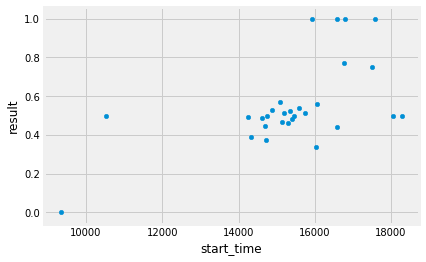

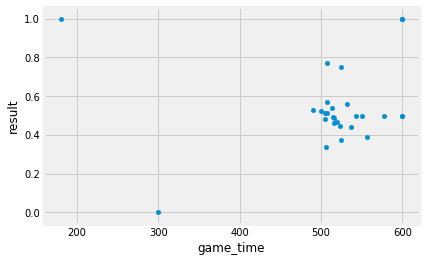

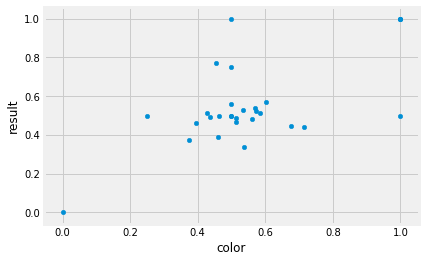

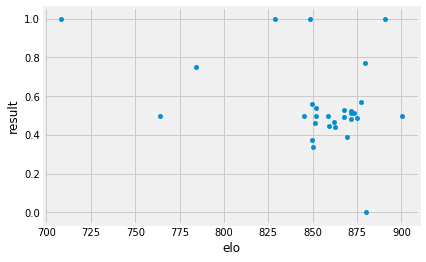

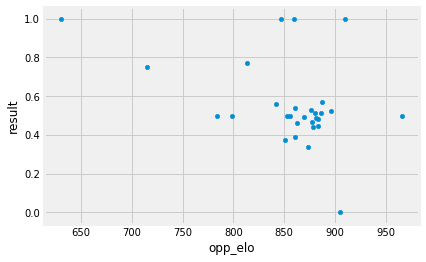

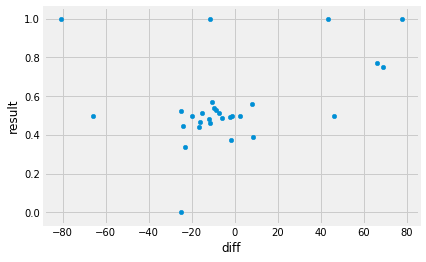

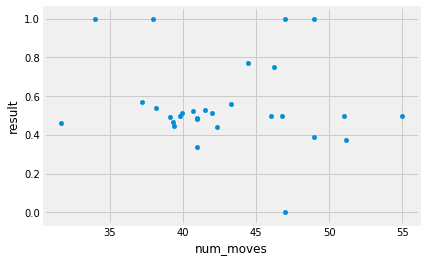

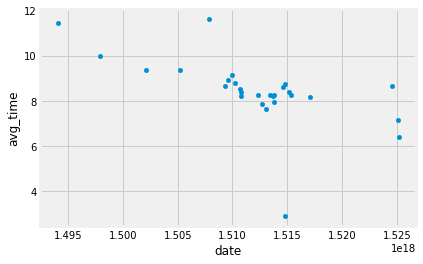

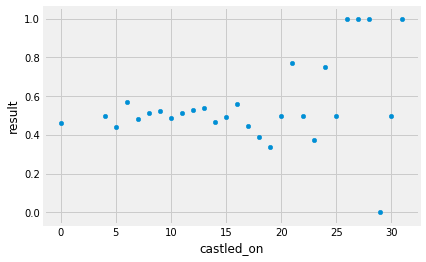

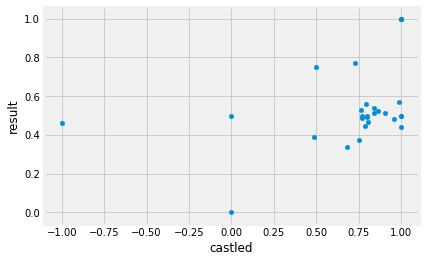

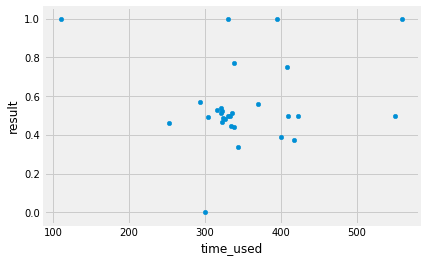

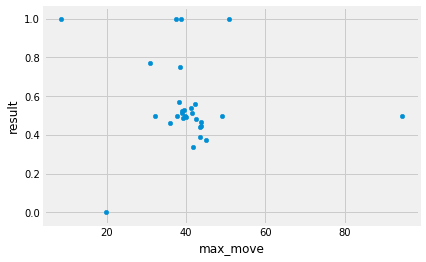

In [5]:
df = df.groupby(by='castled_on').mean().reset_index()
df.plot.scatter(x='start_time', y='result')
df.plot.scatter(x='game_time', y='result')
df.plot.scatter(x='color', y='result')
df.plot.scatter(x='elo', y='result')
df.plot.scatter(x='opp_elo', y='result')
df.plot.scatter(x='diff', y='result')
#df.plot.scatter(x='result', y='result')
df.plot.scatter(x='num_moves', y='result')
df.plot.scatter(x='date', y='avg_time')
df.plot.scatter(x='castled_on', y='result')
df.plot.scatter(x='castled', y='result')
df.plot.scatter(x='time_used', y='result')
df.plot.scatter(x='max_move', y='result')
plt.show()

In [79]:
# 2. 'result'
# 3. 'game_time'
# 4. 'end_time'
# 5. 'num_moves'
# 6. 'color'
# 7. 'won_by':
#     - checkmate = 9
#     - resignation = 8
#     - time = 7
#     - material = 6
#     - agreement = 5
#     - repetition = 4
#     - abandoned = 3
#     - stalemate = 2
#     - rule = 1
# 8. 'weekday'
# 9. 'day'
# 10. 'castled_on'
# 11. 'opp_castled_on'
# 12. 'castled'
# 13. 'opp_castled'
# 14. 'time_used'
# 15. 'opp_time_used'
# 16. 'opp_num_moves'
# 17. 'avg_time'
# 18. 'opp_avg_time'
# 19. 'max_time'
# 20. 'opp_max_time'
# 21. 'elo'
# 22. 'opp_elo'
# 23. 'diff'